<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Null-value-exploratory" data-toc-modified-id="Null-value-exploratory-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Null value exploratory</a></span></li><li><span><a href="#Extract-histogram-features" data-toc-modified-id="Extract-histogram-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Extract histogram features</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Drop-null-values" data-toc-modified-id="Drop-null-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop null values</a></span></li><li><span><a href="#Fill-null-values-with-mean-and-create-null-indicator-features" data-toc-modified-id="Fill-null-values-with-mean-and-create-null-indicator-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fill null values with mean and create null indicator features</a></span></li><li><span><a href="#Convert-to-proper-dtypes" data-toc-modified-id="Convert-to-proper-dtypes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convert to proper dtypes</a></span></li><li><span><a href="#Save-preprocessed-data-with-labels" data-toc-modified-id="Save-preprocessed-data-with-labels-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Save preprocessed data with labels</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Dummy-model" data-toc-modified-id="Dummy-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dummy model</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>K-Nearest Neighbors</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LightGBM</a></span><ul class="toc-item"><li><span><a href="#data-preprocessing-for-LightGBM" data-toc-modified-id="data-preprocessing-for-LightGBM-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>data preprocessing for LightGBM</a></span></li><li><span><a href="#train-and-test-lightgbm-model" data-toc-modified-id="train-and-test-lightgbm-model-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>train and test lightgbm model</a></span></li><li><span><a href="#data-preprocessing-for-LightGBM-without-null-indicator" data-toc-modified-id="data-preprocessing-for-LightGBM-without-null-indicator-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>data preprocessing for LightGBM without null indicator</a></span></li><li><span><a href="#train-and-test-lightgbm-model-without-null-indicator" data-toc-modified-id="train-and-test-lightgbm-model-without-null-indicator-3.6.4"><span class="toc-item-num">3.6.4&nbsp;&nbsp;</span>train and test lightgbm model without null indicator</a></span></li></ul></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li></ul></div>

In [16]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer
from pyautomodel import utils

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
## load dataset
data = pd.read_csv('./aps_failure_training_set.csv')
target = data['class'].map({'neg': 0, 'pos': 1})
data = data.drop('class', axis=1)

# Exploratory data analysis

## Null value exploratory

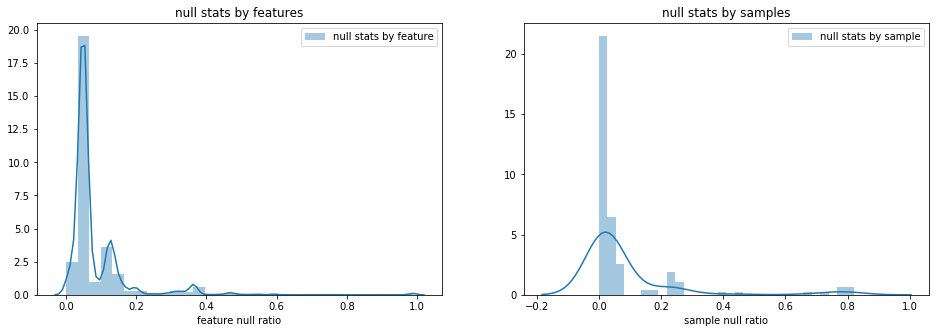

In [6]:
## null value statistics by columns and by rows
_ = data.isnull()
null_stats_row = _.sum(axis=1) / data.shape[1]
null_stats_col = _.sum(axis=0) / data.shape[0]

# plot the null statistics
f, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(null_stats_row, ax=axs[0], bins=30, axlabel= 'feature null ratio', label='null stats by feature').legend()
sns.distplot(null_stats_col, ax=axs[1], bins=30, axlabel='sample null ratio', label='null stats by sample').legend()
axs[0].set_title('null stats by features')
axs[1].set_title('null stats by samples')
plt.show()

`Comment:
    From the 'null stats by features' plot, we can find that most features have low null ratio, i.e. less than 0.2, so we choose 0.2 as the threshold to drop these features with null ratio geater than 0.2.
    From the 'null stats by samples' plot, we can find that most samples have low null ratio, i.e. less than 0.4, so we choose 0.4 as the threshold to drop these samples with null ratio greater than 0.4.`

## Extract histogram features

In [7]:
## There are some features are derived from original attributes.
## E.g. features 'ee_000, ee_001, ee_002, ee_003, ee_004, ee_005, ee_006, ee_007, ee_008, ee_009' were derived from original attribute 'ee' by applying histogram to bin it.
## I.e., let's say there are N_i values in that original attribute 'ee' of a sample_i (other samples may have different number of values, i.e. N_j may differ from N_i), 
## there is a count n_0 of values that fall into range 'ee_000', a count n_1 of values that fall into range 'ee_001' and so on,
## then assign n_0 to feature 'ee_000', assign n_1 to feature 'ee_001' and so on.
## So, if we apply argmax('ee000, ..., ee009'), then we can get the bin the original attribute 'ee' is falls into most frequently, 
## we use it as a new feature and vice versa (i.e. argmin('ee000, ..., ee009'))
original_attrs = [attr for attr, count in Counter([col[:2] for col in data.columns]).items() if count > 1]
for attr in original_attrs:
    data[f'{attr}_max'] = data.filter(regex=f"^{attr}_[0-9]*$").apply(lambda row: np.nanargmax(row) if not np.isnan(row).any() else np.NaN, 
                                                                      axis=1, raw=True, result_type='reduce')
    data[f'{attr}_min'] = data.filter(regex=f"^{attr}_[0-9]*$").apply(lambda row: np.nanargmin(row) if not np.isnan(row).any() else np.NaN, 
                                                                      axis=1, raw=True, result_type='reduce')
## normalize the histogram features
for attr in original_attrs:
    _df = data.filter(regex=f"^{attr}_[0-9]*$").apply(lambda row: row / np.nansum(row) if not np.nansum(row) == 0 else [0] * len(row), 
                                                      axis=1, raw=True, result_type='expand').add_suffix('_norm')
    data = pd.concat([data, _df], axis=1)

# Data Preprocessing

## Drop null values

In [8]:
## drop features and columns by threshold
# use 0.4 as feature null stats threshold to drop features
# use 0.2 as sample null stats threshold to drop samples
THRESHOLD_COL = 0.2
THRESHOLD_ROW = 0.4
drop_features = null_stats_col.index[null_stats_col > THRESHOLD_COL]
drop_samples = null_stats_row.index[null_stats_row > THRESHOLD_ROW]
data.drop(drop_features, axis=1, inplace=True)
data.drop(drop_samples, axis=0, inplace=True)
target.drop(drop_samples, inplace=True)

## Fill null values with mean and create null indicator features

In [9]:
## fill null values with mean strategy, and create null value indicator features
imp_mean = SimpleImputer(missing_values=np.NaN, strategy='mean', add_indicator=True).fit(data)
data = pd.DataFrame(imp_mean.transform(data), 
                    columns=data.columns.to_list() + (data.columns[imp_mean.indicator_.features_] + '_null_indic').to_list(), 
                    index=data.index)

## Convert to proper dtypes

In [10]:
## convert float dtype columns with only integers to int dtype
# NOTE: make sure there is no NaN value
for col in data.columns:
    if data[col].apply(float.is_integer, convert_dtype=False).all():
        data[col] = data[col].astype(np.int)
# reduce memory usage
data = utils.reduce_mem_usage(data)

## Save preprocessed data with labels

In [11]:
pd.concat([data, target], axis=1).to_pickle('./preprc_data.pkl')

# Modeling

## Dummy model

In [12]:
from sklearn.dummy import DummyClassifier

In [14]:
dummy_clf = DummyClassifier(strategy='most_frequent').fit(data, target)
dummy_clf.score(data, target)

0.9835301271980945

## Logistic Regression

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pyautomodel.automodel.logisticOptimizer import LogisticOptimizer

In [49]:
## load data
data = pd.read_pickle('./preprc_data.pkl')

## scaling original features
original_feats = data.filter(regex='[0-9]$').columns.to_list()
data[original_feats] = StandardScaler().fit_transform(data[original_feats])

## split target and features
X, y = data.drop('class', axis=1), data['class']

In [70]:
## training and testing set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
lr = LogisticRegression(penalty='elasticnet', class_weight='balanced', solver='saga', l1_ratio=0.2, max_iter=5000).fit(X_train, y_train)

In [73]:
lr.score(test_X, test_y)

0.9757601351351352

## K-Nearest Neighbors

## Random Forest

In [10]:
from pyautomodel.automodel.logisticOptimizer import LogisticOptimizer

In [ ]:
LogisticOptimizer()

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100).fit()

## XGBoost

## LightGBM

### data preprocessing for LightGBM

In [5]:
## load dataset
data = pd.read_csv('./aps_failure_training_set.csv')
target = data['class'].map({'pos': 1, 'neg': 0})
data = data.drop('class', axis=1)
## extract histogram features
original_attrs = [attr for attr, count in Counter([col[:2] for col in data.columns]).items() if count > 1]
for attr in original_attrs:
    data[f'{attr}_max'] = data.filter(regex=f"^{attr}_[0-9]*$").apply(lambda row: np.nanargmax(row) if not np.isnan(row).any() else np.NaN, 
                                                                      axis=1, raw=True, result_type='reduce')
    data[f'{attr}_min'] = data.filter(regex=f"^{attr}_[0-9]*$").apply(lambda row: np.nanargmin(row) if not np.isnan(row).any() else np.NaN, 
                                                                      axis=1, raw=True, result_type='reduce')
## normalize the histogram features and add histogram features null value indicator features
for attr in original_attrs:
    _df = data.filter(regex=f"^{attr}_[0-9]*$").apply(lambda row: row / np.nansum(row) if not np.nansum(row) == 0 else [0] * len(row), 
                                                      axis=1, raw=True, result_type='expand').add_suffix('_norm')
    data = pd.concat([data, _df], axis=1)
## convert float dtypes to integer if possible
for col in data.columns[data.dtypes == 'float']:
    if data[col].apply(float.is_integer, convert_dtype=False).all():
        data[col] = data[col].astype(np.int)
# reduce memory usage
data = utils.reduce_mem_usage(data)

### train and test lightgbm model

In [6]:
from pyautomodel.automodel import PARAMS_EXAMPLES
from pyautomodel.automodel.lightgbmOptimizer import LightgbmOptimizerBinary

In [7]:
base_params = PARAMS_EXAMPLES['lightgbm']['base_params']
cat_params = PARAMS_EXAMPLES['lightgbm']['cat_params']
int_params = PARAMS_EXAMPLES['lightgbm']['int_params']
float_params = PARAMS_EXAMPLES['lightgbm']['float_params']

In [8]:
lgb_optimizer = LightgbmOptimizerBinary(data, target, base_params, cat_params, int_params, float_params, 
                                        num_opts=1000, trials_path='./trials.pkl', load_trials=True, 
                                        lgb_num_boost_round=3000, lgb_early_stopping_rounds=400, 
                                        test_size=0.25, shuffle=True, random_state=0, cv=5, strategy='stratified', group=None)

In [9]:
lgb_optimizer.optimize()

100%|██████████| 1000/1000 [1:20:38<00:00,  5.30s/it, best loss: -0.9818797033898307]


In [14]:
lgb_254 = lgb_optimizer.get_best_model()

[1]	Train's auc: 0.95178	Train's binary_logloss: 1.73538	Train's binary_error: 0.0881778	Eval's auc: 0.941723	Eval's binary_logloss: 1.7649	Eval's binary_error: 0.0898
Training until validation scores don't improve for 400 rounds
[2]	Train's auc: 0.961946	Train's binary_logloss: 1.10089	Train's binary_error: 0.0903778	Eval's auc: 0.9511	Eval's binary_logloss: 1.12363	Eval's binary_error: 0.0925333
[3]	Train's auc: 0.96215	Train's binary_logloss: 0.38996	Train's binary_error: 0.0893111	Eval's auc: 0.950401	Eval's binary_logloss: 0.401129	Eval's binary_error: 0.0919333
[4]	Train's auc: 0.978277	Train's binary_logloss: 0.237965	Train's binary_error: 0.0890889	Eval's auc: 0.964031	Eval's binary_logloss: 0.2476	Eval's binary_error: 0.0910667
[5]	Train's auc: 0.983482	Train's binary_logloss: 0.18675	Train's binary_error: 0.0516444	Eval's auc: 0.968589	Eval's binary_logloss: 0.196069	Eval's binary_error: 0.0555333
[6]	Train's auc: 0.985588	Train's binary_logloss: 0.16837	Train's binary_error:

[96]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[97]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[98]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[99]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[100]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[101]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.9

[149]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[150]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[151]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[152]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[153]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[154]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc:

[203]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[204]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[205]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[206]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[207]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[208]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc:

[258]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[259]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[260]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[261]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[262]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[263]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc:

[312]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[313]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[314]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[315]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[316]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[317]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc:

[365]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[366]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[367]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[368]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[369]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[370]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc:

[418]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[419]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[420]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[421]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[422]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc: 0.980842	Eval's binary_logloss: 0.0872604	Eval's binary_error: 0.0286667
[423]	Train's auc: 0.992291	Train's binary_logloss: 0.0815799	Train's binary_error: 0.0259111	Eval's auc:

In [17]:
pickle.dump(lgb_254, open('./Models/lgb_254.pkl', 'wb'))

### data preprocessing for LightGBM without null indicator

In [18]:
## load dataset
data = pd.read_csv('./aps_failure_training_set.csv')
target = data['class'].map({'pos': 1, 'neg': 0})
data = data.drop('class', axis=1)
## extract histogram features
original_attrs = [attr for attr, count in Counter([col[:2] for col in data.columns]).items() if count > 1]
for attr in original_attrs:
    data[f'{attr}_max'] = data.filter(regex=f"^{attr}_[0-9]*$").apply(lambda row: np.nanargmax(row) if not np.isnan(row).any() else np.NaN, 
                                                                      axis=1, raw=True, result_type='reduce')
    data[f'{attr}_min'] = data.filter(regex=f"^{attr}_[0-9]*$").apply(lambda row: np.nanargmin(row) if not np.isnan(row).any() else np.NaN, 
                                                                      axis=1, raw=True, result_type='reduce')

### train and test lightgbm model without null indicator

In [23]:
lgb_optimizer = LightgbmOptimizerBinary(data, target, base_params, cat_params, int_params, float_params, 
                                        num_opts=1000, trials_path='./Trials/trials_184.pkl', load_trials=False, 
                                        lgb_num_boost_round=3000, lgb_early_stopping_rounds=400, 
                                        test_size=0.25, shuffle=True, random_state=0, cv=5, strategy='stratified', group=None)

In [24]:
lgb_optimizer.optimize()

100%|██████████| 1000/1000 [1:41:42<00:00,  6.79s/it, best loss: -0.9796184745762713]


In [25]:
lgb_184 = lgb_optimizer.get_best_model()
pickle.dump(lgb_184, open('./Models/lgb_184.pkl', 'wb'))

[1]	Train's auc: 0.992594	Train's binary_logloss: 0.968194	Train's binary_error: 0.0364444	Eval's auc: 0.976624	Eval's binary_logloss: 1.03109	Eval's binary_error: 0.0398667
Training until validation scores don't improve for 400 rounds
[2]	Train's auc: 0.144987	Train's binary_logloss: 0.606741	Train's binary_error: 0.0218444	Eval's auc: 0.0865324	Eval's binary_logloss: 0.671201	Eval's binary_error: 0.0244
[3]	Train's auc: 0.974918	Train's binary_logloss: 1.18583	Train's binary_error: 0.0367111	Eval's auc: 0.924466	Eval's binary_logloss: 1.31781	Eval's binary_error: 0.0420667
[4]	Train's auc: 0.923877	Train's binary_logloss: 1.07764	Train's binary_error: 0.0326667	Eval's auc: 0.837268	Eval's binary_logloss: 1.23415	Eval's binary_error: 0.0386
[5]	Train's auc: 0.972819	Train's binary_logloss: 1.22803	Train's binary_error: 0.0365333	Eval's auc: 0.886201	Eval's binary_logloss: 1.38236	Eval's binary_error: 0.0424667
[6]	Train's auc: 0.961066	Train's binary_logloss: 1.26967	Train's binary_er

[74]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[75]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[76]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[77]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[78]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[79]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2

[123]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[124]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[125]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[126]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[127]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[128]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logl

[171]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[172]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[173]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[174]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[175]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[176]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logl

[223]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[224]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[225]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[226]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[227]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[228]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logl

[273]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[274]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[275]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[276]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[277]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[278]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logl

[323]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[324]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[325]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[326]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[327]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[328]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logl

[373]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[374]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[375]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[376]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[377]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logloss: 2.08844	Eval's binary_error: 0.0605333
[378]	Train's auc: 0.97976	Train's binary_logloss: 2.05576	Train's binary_error: 0.0595556	Eval's auc: 0.964187	Eval's binary_logl

## CatBoost